In [1]:
import os
import sys
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

In [2]:
import PublicDataReader as pdr
from config import API_KEY_INFO
print(pdr.__version__)

1.0.22


# FRED API Instance

In [7]:
from PublicDataReader import Fred
api = Fred(API_KEY_INFO["fred"])

In [12]:
import pandas as pd

## 시리즈 검색

In [10]:
search_text = "consumer price index"
result = api.get_data(api_name="series_search", search_text=search_text)
result.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,CPIAUCSL,2023-06-14,2023-06-14,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-05-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-06-13 07:44:03-05,95,96,The Consumer Price Index for All Urban Consume...
1,CPIAUCNS,2023-06-14,2023-06-14,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2023-05-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-06-13 07:44:06-05,74,96,Handbook of Methods (https://www.bls.gov/opub/...
2,CUUS0000SA0,2023-06-14,2023-06-14,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2022-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-01-12 07:38:17-06,42,96,NaN
3,CORESTICKM159SFRBATL,2023-06-14,2023-06-14,Sticky Price Consumer Price Index less Food an...,1967-12-01,2023-05-01,Monthly,M,Percent Change from Year Ago,% Chg. from Yr. Ago,Seasonally Adjusted,SA,2023-06-13 12:01:01-05,85,86,The Sticky Price Consumer Price Index (CPI) is...
4,FPCPITOTLZGUSA,2023-06-14,2023-06-14,"Inflation, consumer prices for the United States",1960-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-09 14:09:01-05,85,85,Inflation as measured by the consumer price in...


## Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCNS)

- https://fred.stlouisfed.org/series/CPIAUCNS

In [20]:
# 계절에 따라 조정되지 않음 - CPIAUCNS - https://fred.stlouisfed.org/series/CPIAUCNS
series_id = "CPIAUCNS"

df = api.get_data(api_name="series_observations", series_id=series_id)
df['value'] = pd.to_numeric(df['value'])
df['date'] = pd.to_datetime(df['date'])

df = df.set_index("date")
df['value_last_year'] = df['value'].shift(12)
df['change_rate'] = (df['value'] - df['value_last_year']) / df['value_last_year'] * 100

df.tail()

,realtime_start,realtime_end,value,value_last_year,change_rate
date,,,,,
2023-01-01,2023-06-14,2023-06-14,299.170,281.148,6.410147
2023-02-01,2023-06-14,2023-06-14,300.840,283.716,6.035613
2023-03-01,2023-06-14,2023-06-14,301.836,287.504,4.984974
2023-04-01,2023-06-14,2023-06-14,303.363,289.109,4.930320
2023-05-01,2023-06-14,2023-06-14,304.127,292.296,4.047609


## Federal Funds Effective Rate (DFF)

- https://fred.stlouisfed.org/series/DFF

In [21]:
series_id = "DFF"

df2 = api.get_data(api_name="series_observations", series_id=series_id)
df2['value'] = pd.to_numeric(df2['value'])
df2['date'] = pd.to_datetime(df2['date'])

df2 = df2.set_index('date')
df2['value_last_year'] = df2['value'].shift(12)
df2['change_rate'] = (df2['value'] - df2['value_last_year']) / df2['value_last_year'] * 100

df2.tail()

,realtime_start,realtime_end,value,value_last_year,change_rate
date,,,,,
2023-06-08,2023-06-14,2023-06-14,5.08,5.08,0.0
2023-06-09,2023-06-14,2023-06-14,5.08,5.08,0.0
2023-06-10,2023-06-14,2023-06-14,5.08,5.08,0.0
2023-06-11,2023-06-14,2023-06-14,5.08,5.08,0.0
2023-06-12,2023-06-14,2023-06-14,5.08,5.08,0.0


## Unemployment Rate (UNRATE)

- https://fred.stlouisfed.org/series/UNRATE

In [22]:
series_id = "UNRATE"

df3 = api.get_data(api_name="series_observations", series_id=series_id)
df3['value'] = pd.to_numeric(df3['value'])
df3['date'] = pd.to_datetime(df3['date'])

df3 = df3.set_index('date')
df3['value_last_year'] = df3['value'].shift(12)
df3['change_rate'] = (df3['value'] - df3['value_last_year']) / df3['value_last_year'] * 100

df3.tail()

,realtime_start,realtime_end,value,value_last_year,change_rate
date,,,,,
2023-01-01,2023-06-14,2023-06-14,3.4,4.0,-15.000000
2023-02-01,2023-06-14,2023-06-14,3.6,3.8,-5.263158
2023-03-01,2023-06-14,2023-06-14,3.5,3.6,-2.777778
2023-04-01,2023-06-14,2023-06-14,3.4,3.6,-5.555556
2023-05-01,2023-06-14,2023-06-14,3.7,3.6,2.777778


## 시각화

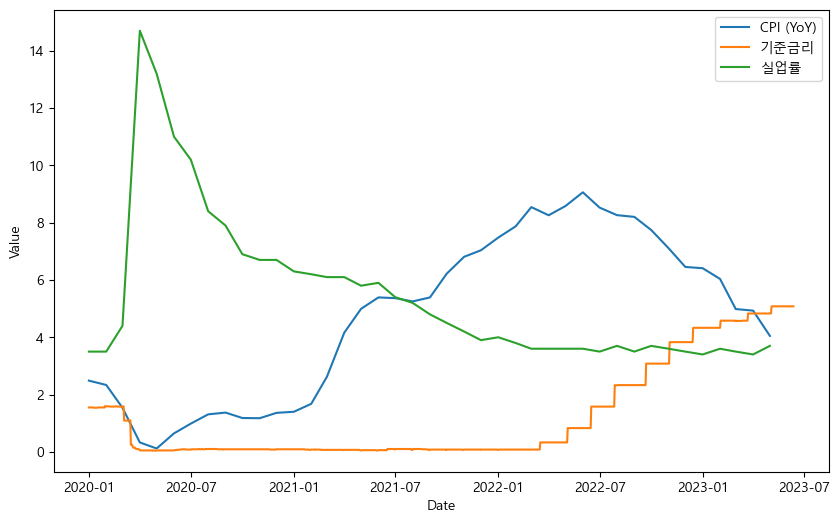

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

# Filter data for years 2020 and after
df = df.loc['2020':]
df2 = df2.loc['2020':]
df3 = df3.loc['2020':]

# Create the plot
plt.figure(figsize=(10, 6))

# Add each line
plt.plot(df.index, df['change_rate'], label='CPI (YoY)')
plt.plot(df2.index, df2['value'], label='기준금리')
plt.plot(df3.index, df3['value'], label='실업률')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()